In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
from pandas_profiling import ProfileReport
dftr = pd.read_csv("tr.csv")
dfts = pd.read_csv("ts.csv")
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy import stats
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import Pool, cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier
import keras.layers 
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder as ohc

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [38]:
dftr.shape

(93174, 23)

In [39]:
dfts.shape

(39933, 22)

In [55]:
np.where(dftr.dtypes == "object")[0]

array([ 2,  4,  5,  6,  7,  9, 10, 11, 18])

In [40]:
dftr.head(1)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.6,INDIVIDUAL,4.0,95493.0,84100.0,0


In [41]:
dfts.head(1)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,...,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0


In [42]:
dfts.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

In [43]:
dftr.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [44]:
dfts.nunique()

ID                            39933
loan_amnt                      1223
loan_term                         2
interest_rate                   430
loan_grade                        7
loan_subgrade                    35
job_experience                    3
home_ownership                    5
annual_income                  4381
income_verification_status        3
loan_purpose                      4
state_code                       50
debt_to_income                 3880
delinq_2yrs                      17
public_records                   13
revolving_balance             23838
total_acc                        95
interest_receive              33678
application_type                  2
last_week_pay                    86
total_current_balance         33952
total_revolving_limit          2752
dtype: int64

In [45]:
dftr.nunique()

ID                            93174
loan_amnt                      1310
loan_term                         2
interest_rate                   481
loan_grade                        7
loan_subgrade                    35
job_experience                    3
home_ownership                    5
annual_income                  8667
income_verification_status        3
loan_purpose                      4
state_code                       50
debt_to_income                 3996
delinq_2yrs                      22
public_records                   15
revolving_balance             35945
total_acc                       102
interest_receive              69122
application_type                  2
last_week_pay                    90
total_current_balance         72306
total_revolving_limit          4469
default                           2
dtype: int64

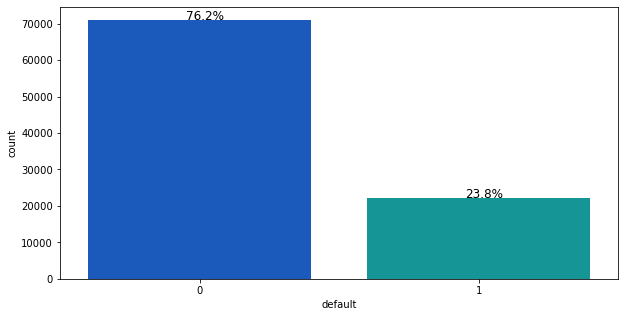

In [46]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot
plt.figure(figsize=(10, 5))
ax = sns.countplot(dftr["default"], palette="winter")
perc_on_bar(ax, dftr["default"])

our data shows that less than 1/4 of the customers defaulted on the loan.

Bivatariate on training file

Split Training CV into Test and Training Set

In [8]:
X = dftr.drop(columns="default")
Y = dftr["default"]

In [39]:
X.iloc[:,np.where(dftr.dtypes == "object")[0]] = X.iloc[:,np.where(dftr.dtypes == "object")[0]].astype(str)


In [10]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(65221, 22) (27953, 22)


Training has 65,221 line items and 22 columns while the test has 27,953 line items and 22 columns.

In [11]:
CBC = CatBoostClassifier()
CBC.fit(X_train, y_train, eval_set = (X_test,y_test),cat_features = np.where(dftr.dtypes == "object")[0])

Learning rate set to 0.088933
0:	learn: 0.6244969	test: 0.6253875	best: 0.6253875 (0)	total: 109ms	remaining: 1m 49s
1:	learn: 0.5707709	test: 0.5726199	best: 0.5726199 (1)	total: 145ms	remaining: 1m 12s
2:	learn: 0.5284343	test: 0.5306927	best: 0.5306927 (2)	total: 178ms	remaining: 59.2s
3:	learn: 0.4867830	test: 0.4898638	best: 0.4898638 (3)	total: 215ms	remaining: 53.5s
4:	learn: 0.4529065	test: 0.4566817	best: 0.4566817 (4)	total: 253ms	remaining: 50.3s
5:	learn: 0.4263170	test: 0.4305551	best: 0.4305551 (5)	total: 290ms	remaining: 48.1s
6:	learn: 0.4035758	test: 0.4085023	best: 0.4085023 (6)	total: 332ms	remaining: 47.1s
7:	learn: 0.3888108	test: 0.3942723	best: 0.3942723 (7)	total: 376ms	remaining: 46.6s
8:	learn: 0.3742644	test: 0.3801644	best: 0.3801644 (8)	total: 417ms	remaining: 45.9s
9:	learn: 0.3649741	test: 0.3711939	best: 0.3711939 (9)	total: 457ms	remaining: 45.2s
10:	learn: 0.3557137	test: 0.3621698	best: 0.3621698 (10)	total: 493ms	remaining: 44.4s
11:	learn: 0.3444308

In [12]:
import sklearn

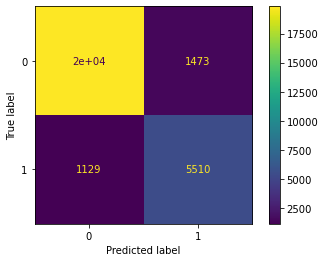

In [13]:
sklearn.metrics.plot_confusion_matrix(CBC,X_test, y_test)

As we can see, the model is accurate as ratio appears to show that most didn't default.

In [14]:
from sklearn.metrics import plot_roc_curve

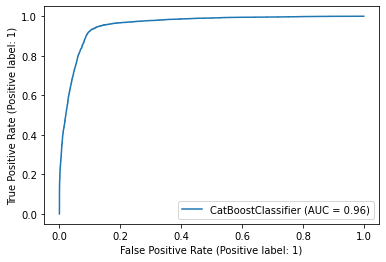

In [15]:
plot_roc_curve(CBC,X_test,y_test)

AUC is .96 which means model is highly accurate.

In [37]:
dfts.iloc[:,np.where(dfts.dtypes == "object")[0]] = dfts.iloc[:,np.where(dfts.dtypes == "object")[0]].astype(str)

In [27]:
CBC.score(X_test,y_test)

0.9069151790505491

Accuracy score using cat boost on training set is 90.67%

In [28]:
submission = dfts[["ID"]]
submission["default"] = CBC.predict(dfts)
submission.to_csv("sub.csv",index=False)